[5.5 2.4 3.7 1. ]
[6.7 3.1 4.7 1.5]
[5.6 2.9 3.6 1.3]
[4.9 2.4 3.3 1. ]
[5.9 3.2 4.8 1.8]
[6.4 2.7 5.3 1.9]
[7.2 3.  5.8 1.6]
[6.3 2.5 4.9 1.5]
[5.8 4.  1.2 0.2]
[6.7 3.3 5.7 2.5]
[4.6 3.4 1.4 0.3]
[6.3 2.5 5.  1.9]
[5.9 3.  4.2 1.5]
[7.7 3.  6.1 2.3]
[5.2 4.1 1.5 0.1]
[4.5 2.3 1.3 0.3]
[6.2 2.2 4.5 1.5]
[5.4 3.4 1.5 0.4]
[5.1 3.3 1.7 0.5]
[5.6 3.  4.1 1.3]
[5.8 2.8 5.1 2.4]
[6.  2.7 5.1 1.6]
[4.4 3.  1.3 0.2]
[5.2 3.4 1.4 0.2]
[6.  2.2 4.  1. ]
[5.7 2.6 3.5 1. ]
[6.3 3.4 5.6 2.4]
[6.7 3.1 5.6 2.4]
[6.3 2.9 5.6 1.8]
[5.4 3.4 1.7 0.2]
[6.2 2.8 4.8 1.8]
[6.7 3.  5.  1.7]
[6.9 3.1 4.9 1.5]
[5.1 3.5 1.4 0.2]
[6.9 3.1 5.4 2.1]
[5.8 2.7 3.9 1.2]
[5.  3.4 1.5 0.2]
[6.  3.4 4.5 1.6]
[6.7 3.1 4.4 1.4]
[4.9 3.1 1.5 0.1]
[6.9 3.2 5.7 2.3]
[5.5 2.4 3.8 1.1]
[6.3 3.3 4.7 1.6]
[7.2 3.6 6.1 2.5]
[5.  2.  3.5 1. ]
[7.1 3.  5.9 2.1]
[5.6 2.5 3.9 1.1]
[6.1 2.6 5.6 1.4]
[6.2 2.9 4.3 1.3]
[5.  2.3 3.3 1. ]
[5.8 2.7 5.1 1.9]
[6.1 2.8 4.7 1.2]
[5.7 2.8 4.5 1.3]
[6.7 3.3 5.7 2.1]
[5.1 2.5 3.  1.1]
[5.1 3.8 1

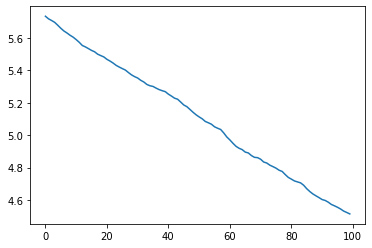

correct 50
incorrect 100


In [6]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt


# сигмоида
def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))
# Производная сигмоиды.
def sigmoid_derivative_activation(x):
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))
# Возвденние в квадрат
def square(x):
    return x * x


square = np.vectorize(square)
size_input = 4 #Количество входных признаков
first_layer = 6 #Количество нейронов в первом слое
second_layer = 3 #Количество нейронов во втором слое
gradient_step = 0.1 #Шаг обучения

def errors(result, expected_class):
    expected_vector = np.array([0, 0, 0])
    expected_vector[expected_class] = 1
    # считаем ошибку по MSE для каждого класса и складываем
    sum_errors = sum(square(result - expected_vector))
    return (sum_errors, np.array([result - expected_vector]))

if __name__ == '__main__':
    df = pd.read_csv('data.csv')
    df = df.iloc[np.random.permutation(len(df))]
    # возьмем перые 150 строк, 4-й столбец 
    y = df.iloc[0:150, 4].values
    # так как ответы строки - переходим к численным значениям
    y = np.where(y == "Iris-setosa", 0, y)
    y = np.where(y == "Iris-versicolor", 1, y)
    y = np.where(y == "Iris-virginica", 2, y)

    # возьмем 4 признака, чтобы было удобне визуализировать задачу
    X = df.iloc[0:150, 0:4].values

    # матрица весов первого слоя
    W_1 = np.random.rand(size_input, first_layer)
    # матрица весов второго  слоя
    W_2 = np.random.randn(first_layer, second_layer)

    for x_input in X:
        print(x_input)

    vector_sigmoid_activation = np.vectorize(sigmoid_activation)
    vector_sigmoid_derivative_activation = np.vectorize(sigmoid_derivative_activation)

    ziped = zip(X, y)
    zipped_list = list(ziped)

    # гиперпараметры
    epoch = 100
    batch_size = 25

    count_batch = (int(len(zipped_list) / batch_size))

    errors_epoch = []
    for i in range(epoch):
        error_epoch = 0
        random.shuffle(zipped_list)
        for j in range(1, count_batch + 1):
            
            #пакет батчей
            batch = zipped_list[batch_size * j - batch_size:batch_size * j]

            #Матрицы весов
            new_W_1 = np.zeros((size_input, first_layer))
            new_W_2 = np.zeros((first_layer, second_layer))
            sum_errors = 0
            
            for x_input, expected in batch:
                #Вводим данные и ожидаемый результат
                o1 = x_input @ W_1
                o1_activated = vector_sigmoid_activation(o1)
                o2 = o1_activated @ W_2
                o2_activated = vector_sigmoid_activation(o2)
                #Вычисляем ошибку
                error, expected_vector = errors(o2_activated, expected)
                sum_errors = sum_errors + error
                          


            #Вычисляем градиенты для слоев
            de_e = vector_sigmoid_derivative_activation(o2) * expected_vector
            de_dw2 = np.dot(np.array([o1_activated]).T, de_e)
            de_o1_activated = de_e @ W_2.T
            de_01 = vector_sigmoid_derivative_activation(o1) * de_o1_activated
            de_dw1 = np.array([x_input]).T @ de_01 
             #Обновляем веса
            new_W_1 = new_W_1 + de_dw1
            new_W_2 = new_W_2 + de_dw2
            #Средняя ошибка для пакета
            W_1 = W_1 - gradient_step * (new_W_1 / batch_size)
            W_2 = W_2 - gradient_step * (new_W_2 / batch_size)
            print('error in batch', sum_errors / batch_size)
            error_epoch += sum_errors / batch_size
        print('error in epoch', sum_errors / batch_size)
        errors_epoch.append(error_epoch)

    plt.plot(errors_epoch)
    plt.show()

    correct = 0
    incorrect = 0
    #Подсчет корректных и некорректных результатов
    for x_input, expected in zipped_list:
        o1 = x_input @ W_1
        o1_activated = vector_sigmoid_activation(o1)
        o2 = o1_activated @ W_2
        o2_activated = vector_sigmoid_activation(o2)
        error, expected_vector = errors(o2_activated, expected)
        sum_errors += error
        if np.argmax(o2_activated, axis=0) == expected:
            correct += 1
        else:
            incorrect += 1

    print('correct', correct)
    print('incorrect', incorrect)